In [1]:
# Import necessary packages and Modules

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50V2

tf.random.set_seed(4)

In [2]:
# Function to get label of Test Image

def get_label(image_path):
  return image_path.split("/")[-2]

In [3]:
# Test Image Path

test_path = Path("fruits/fruits-360_dataset/fruits-360/Test")
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x:str(x), test_image_paths))
test_labels = list(map(lambda x:get_label(x), test_image_paths))

In [4]:
# Encode Image Labels

Le = LabelEncoder()
test_labels = Le.fit_transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
#Convert Image and Labels to Tensorflow Tensors

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

2022-04-03 18:02:13.564814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-03 18:02:13.609613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-03 18:02:13.610043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-03 18:02:13.612850: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-03 18:02:13.613409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

In [6]:
# Image and Batch Size
IMG_SIZE = 224
BATCH_SIZE = 32

In [7]:
# Function to Load Test Image

def decode_image(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE], method = 'bilinear')
    return image, label

In [8]:
# Define Test Dataset

test_dataset = (
    tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

(32, 224, 224, 3)
(32, 131)


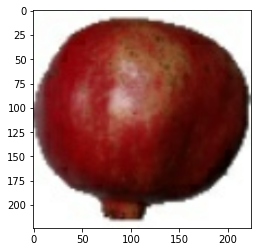

In [9]:
# View a Image from Test Dataset

image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [10]:
#Load the Saved Model

Final_Model = tf.keras.models.load_model('saved_model/Model_Efficient')

# Print Summary of the Loaded model
Final_Model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 131)               201347    
                                                                 
Total params: 10,984,882
Trainable params: 201,347
Non-trainable params: 10,783,535
_________________________________________________________________


In [11]:
# Evaluate the model on Test Dataset

loss, acc, prec, rec = Final_Model.evaluate(test_dataset)

print("Test Accuracy : ", acc)
print("Test Precision : ", prec)
print("Test Recall : ", rec)

2022-04-03 18:02:45.099062: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


709/709 [==============================] - 155s 212ms/step - loss: 1.0397 - accuracy: 0.8062 - precision: 0.8291 - Recall: 0.7920
Test Accuracy :  0.8061971068382263
Test Precision :  0.8291264772415161
Test Recall :  0.7919605374336243


In [12]:
# Function to Load Test Image for Prediction

def Load_Image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE], method = 'bilinear')
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image,0)
    return image

In [21]:
# Function to Predict and show prediction
def Predict_Image(image_path, model, encoder):
    image = Load_Image(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction, axis = 1)
    return encoder.inverse_transform(prediction)[0]

'Avocado'

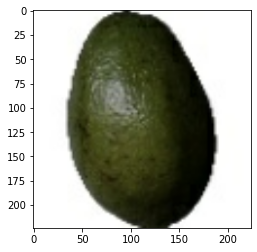

In [32]:
# Predict a Random Fruit. For this case, we shall predict a random image from Test Images
Predict_Image("fruits/fruits-360_dataset/fruits-360/Test/Avocado/53_100.jpg", Final_Model, Le)

'Banana Red'

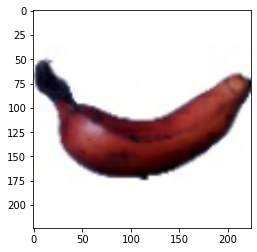

In [26]:
Predict_Image("fruits/fruits-360_dataset/fruits-360/Test/Banana Red/152_100.jpg", Final_Model, Le)